In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
def clean_pmc(x):
    # first check if it is already in proper form
    try:
        x = x.split(' ')
        x = re.sub('[^0-9]','', x[0])
        return int(x)
    except:
        return np.nan
def clean_cost(x):
    # remove the currency symbol
    try:
        x = re.sub('[^\d\.\,\s]+','',x)
        return float(x)
    except:
        return np.nan
    

In [3]:
# different encodings?
converters = {"PMID/PMCID" : clean_pmc, 
              "COST (£) charged to Wellcome (inc VAT when charged)" : clean_cost}
df = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", encoding="latin1", converters=converters)
# rename our cols
df.columns = ['PMID/PMCID', 'Publisher', 'Journal title', 'Article title', 'Cost']
# drop missing for now
df.dropna(subset=['Journal title', 'Cost'], inplace=True)
df["Journal title"] = df["Journal title"].apply(lambda x: x.lower() )

# 999999 does not seem like a reasonable price. lets also drop these as they will 
# dramatically effect our stats
df = df.query("Cost != 999999.00")

In [94]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,3679557.0,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264.0,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330.0,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216.0,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,685.88


In [6]:
df.quantile(0.95)

PMID/PMCID    23781722.2
Cost              3120.0
Name: 0.95, dtype: float64

In [8]:
df.query("Cost <= 3120.0").Cost.mean()

1718.7749291497978

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


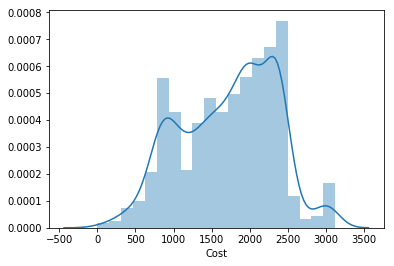

In [11]:
sns.distplot(df.query("Cost <= 3120.0").Cost)

In [106]:
df["Journal title"].value_counts().head()

plos one                           183
journal of biological chemistry     52
neuroimage                          29
nucleic acids research              23
plos pathogens                      22
Name: Journal title, dtype: int64

In [9]:
df.groupby(["Journal title"]).Cost.describe()

,count,mean,std,min,25%,50%,75%,max
Journal title,,,,,,,,
academy of nutrition and dietetics,1.0,2379.540000,NaN,2379.54,2379.5400,2379.540,2379.5400,2379.54
acs chemical biology,5.0,1418.186000,507.309560,947.07,1267.7600,1294.590,1294.7800,2286.73
acs chemical neuroscience,1.0,1186.800000,NaN,1186.80,1186.8000,1186.800,1186.8000,1186.80
acs nano,2.0,668.140000,35.708892,642.89,655.5150,668.140,680.7650,693.39
"acta crystallographica section d, biological crystallography",1.0,771.420000,NaN,771.42,771.4200,771.420,771.4200,771.42
acta crystallographica section d: biological crystallography,1.0,773.740000,NaN,773.74,773.7400,773.740,773.7400,773.74
acta crystallographica section f: structural biology and crystallization communications,2.0,796.635000,15.605847,785.60,791.1175,796.635,802.1525,807.67
"acta crystallographica, section d",1.0,757.180000,NaN,757.18,757.1800,757.180,757.1800,757.18
acta crystallography d,1.0,774.190000,NaN,774.19,774.1900,774.190,774.1900,774.19
